In [1]:
# Checking the kernel
# These are uncertain times :)
+(2, 2)

4

# Using Julia 1.0 for introductory statistics

## Introduction

Julia is well suited to general purpose data analysis.  It has many built-in statistical functions and there are many packages that greatly extend the capabilities of Julia as a scientific programming language for statistics.

In this section we will take a look at introductory statistics using Julia 1.0.  There are differences between this version of Julia and version 0.6.  Not all the packages that are available for version 0.6 and prior, are quite ready for version 1.0.  At the time of recording the packages that are used in this section do all compile and can be used.

In the first part of this section of the course, we will take a look at creating our own data for statistical analysis.  It is great to be able to generate simulated data, especially when you are just starting out and might not have access to proper datasets.

When viewing a new dataset, it is alway good to start by describing it.  Human beings are not designed to look at large tables of data and understand what it is trying to tell us.  Using summarizing, or descriptive, statistics helps us to gain an insight into the data before we start to analyze it.

This section will also look at visualizing data.  It many cases, this allows for an even better understanding of the data.

The `HypothesisTests` and `GLM` packages allow us to do many common statistical tests and we will have a look at Student's _t_ test, linear regression models, and the $\chi^2$ test for independence.

We will conclude with a look at exporting our data in the form of a spreadsheet.  Let's start, though, by importing the packages that we will be using.

## Adding packages

If the packages that are listed below are not installed on your system, then do the following for each package, i.e. `PyPlot`.

```
using Pkg;
Pkg.add("PyPlot")
```

In [1]:
# The loop code below is best run from Julia REPL because IJULIA is slow
# Copy cell and run in JULIA repl
# using Pkg
# import Pkg
# #Check if Pkgs are installed
# Pkg.installed()
# install_pkgs = ["Pyplot", "Distributions", "StatsBase", "CSV", "DataFrames", "HypothesisTests", "StatsPlots", "GLM"]
# for pkg in install_pkgs
#     Pkg.add(pkg)
# end

In [2]:
using Distributions    # Create random variables
using StatsBase        # Basic statistical support
using CSV              # Reading and writing CSV files
using DataFrames       # Create a data structure
using HypothesisTests  # Perform statistical tests
using StatsPlots       # Statistical plotting
using GLM              # General linear models

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1192
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1192
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1192
┌ Info: Precompiling HypothesisTests [09f84164-cd44-5f33-b23f-e6b0d136a0d5]
└ @ Base loading.jl:1192
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1192
┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1192


In [3]:
using Plots

In [4]:
using Plotly

┌ Info: Precompiling Plotly [58dd65bb-95f3-509e-9936-c39a10fdeae7]
└ @ Base loading.jl:1192


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13065069480123397540\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9494781052950300766\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13065069480123397540\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [ ]:
# import Pkg; Pkg.add("Pyplot")
# # If that doesnt work use:: 
# ] add PyPlot

In [7]:
pyplot()               # use pyplot backend 

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1192
┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/Jen/.julia/packages/PyCall/tqyST/src/PyCall.jl:708
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/Jen/.julia/packages/Conda/tJJuN/src/Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/Jen/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |           py38_0          14 KB
    freetype-2.10.4            |       ha233b18_0         564 KB
    jpeg-9b                    |       he5867d9_2         201 KB
    kiwisolver-1.3.1           |   py38h23ab428_0          52 KB
    lcms2-2.11                 |       h92f6f08_0         278 KB
    libpng-1.6.37              |       ha441bb4_0         262 KB
    libtiff-4.2.0              |       h87d7836_0         462 KB
    libwebp-base-1.2.0         |       h9ed2024_0         389 KB
    lz4-c-1.9.3                |       h23ab428_0         140 KB
    matplotlib-3.3.4           |   py38hecd8cb5_0          26 KB
    matplotlib-base-3.3.4      |   py38h8b3ea08_0 

Plots.PyPlotBackend()

## Creating random variable

We mentioned in the introduction that the creation of simulated data is a great way to start learning how to use Julia for statistics.  In the code below, we create five variables with random data point values.

In [11]:
#Creating 100 random nos between range 18 and 80 in an Int64 array
age = rand(18:80, 100);  # Uniform distribution
# println(age)
# length(age)
# typeof(age)

#white cell count
#not necessary to use Distrubutions Normal
#Distributions.Normal(mean, standard deviation), howmany), digits = single decimal pt)
#round. the period is important
wcc = round.(rand(Distributions.Normal(12, 2), 100), digits = 1)  # Normal distribution & round to one decimal place

#crp is c reactive protien
#asking for 100 integers, from Chi Squared
#Distributions.chi squared(degrees of freedom)
#Broadcasting to scaling .muliply10
crp = round.(Int, rand(Distributions.Chisq(4), 100)) .* 10  # Chi-squared distribution with broadcasting & alternate round()

#Passing a list, 100 uniform distribution of either A or B into a 1 dimensional array
treatment = rand(["A", "B"], 100); # Uniformly weighted
#treatment

result = rand(["Improved", "Static", "Worse"], 100);  # Uniformly weighted

## Descriptive statistics

While there are common statistical function in Julia such as `mean()` and `std()`, it is more convenient to use the `describe()` function from the `StatsBase` package.

In [12]:
# Mean of the age variable
println(mean(age))
#median removes outliers
println(median(age))
#standard deviation is the square root of the variance
println(std(age))
#variance
println(var(age))

51.02
51.0
18.12859786652185
328.6460606060606


In [13]:
#The mean should be very close to the standard deviation of 12
#and the standard dev should be close to the mean of 2
println(mean(wcc))
println(std(wcc))

11.795
2.050344883529145


In [14]:
# Descriptive statistics of the age variable
StatsBase.describe(age)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           51.020000
Minimum:        18.000000
1st Quartile:   36.500000
Median:         51.000000
3rd Quartile:   67.250000
Maximum:        80.000000
Type:           Int64


In [15]:
# The summarystats() function omits the length and type
StatsBase.summarystats(wcc)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           11.795000
Minimum:        6.400000
1st Quartile:   10.375000
Median:         12.050000
3rd Quartile:   13.200000
Maximum:        16.100000


## Creating a dataframe

When creating simulated data, it is best to store it in a dataframe object for easier manipulation.

In [16]:
#Format var = DataFrame(col1_name = values, ....)
data = DataFrame(Age = age, WCC = wcc, CRP = crp, Treatment = treatment, Result = result);

In [17]:
# Number of rows and columns
size(data)

(100, 5)

In [18]:
# First six rows
first(data, 6)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,74,11.4,20,A,Worse
2,20,16.1,30,B,Worse
3,47,7.0,40,A,Worse
4,41,14.0,50,A,Static
5,50,13.4,40,A,Worse
6,73,7.5,80,B,Worse


We can create dataframe objects by selecting only subjects according to their data point values for a particular variable.

In [19]:
# In newer version of DataFrames package
# df[!, :Treatment] returns vector
# df[!, [:Treatment]] returns dataframe object

In [20]:
#How to use a boolean ==, !=, to select certain data from a DF
#dataA = data[data[rows:rows, :symbolcolumn] .== "A", (return true if A) :(get all columns)]
dataA = data[data[:, :Treatment] .== "A", :]  # Only patient in treatment group A
dataB = data[data[:, :Treatment] .== "B", :];  # Only patient in treatment group B

In [21]:
first(dataA, 6)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,74,11.4,20,A,Worse
2,47,7.0,40,A,Worse
3,41,14.0,50,A,Static
4,50,13.4,40,A,Worse
5,18,14.6,70,A,Static
6,65,12.8,30,A,Worse


In [22]:
first(dataB, 6)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,20,16.1,30,B,Worse
2,73,7.5,80,B,Worse
3,75,10.9,40,B,Static
4,27,11.7,30,B,Worse
5,23,12.7,40,B,Worse
6,57,13.0,10,B,Improved


In [23]:
#Multiple conditionals
dataC = data[(data[!, :Age] .> 50) .& (data[!, :Treatment] .== "A"), :]
first(dataC, 6)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,74,11.4,20,A,Worse
2,65,12.8,30,A,Worse
3,53,12.0,40,A,Static
4,56,11.8,20,A,Static
5,56,13.0,20,A,Improved
6,63,11.7,40,A,Improved


In [24]:
dataD = data[(data[!, :CRP] .== 50) .& (data[!, :WCC] .>= 12) .& (data[!, :Result] .== "Worse"), :]

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String


## Descriptive statistics using the dataframe object

The `describe()` function will attempt to provide descriptive statistics of the a data object.

In [25]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Age,51.02,18,51.0,80,,,Int64
2,WCC,11.795,6.4,12.05,16.1,,,Float64
3,CRP,42.3,0,30.0,170,,,Int64
4,Treatment,,A,,B,2,,String
5,Result,,Improved,,Worse,3,,String


We can count the number of the elements in the sample space of a categorical variable using the `by()` function.

In [26]:
# Define grouped data
grouped_df = groupby(data, :Treatment)
grouped_df1 = groupby(data, [:Treatment, :Age]);
grouped_df1

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,74,11.4,20,A,Worse
,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,45,12.9,90,A,Improved


In [27]:
#Look up combine
#grouped_df2 = combine(data, :Treatment,[5, 10]);


In [28]:
# Counting the number of patients in groups A and B

# by(data, :Treatment, df -> DataFrame(N = size(df, 1))) has been deprecated.
#This gives an Argument Error
#combine(nrow => :N, grouped_df)

In [29]:
# The size argument will give the same output other than adding the number of variables i.e. 5 columns
# size() returns tuple containing row and column numbers

# by(data, :Treatment, size) has been deprecated.
combine(size, grouped_df)

,Treatment,x1
,String,Tuple…
1,A,"(53, 5)"
2,B,"(47, 5)"


The usual descriptive statistics of a numerical variable can be calculated after separation by a categorical variable.

In [30]:
# ?combine

In [31]:
# Mean age of groups A and B patients
# by(data, :Treatment, df -> mean(df.Age)) has been deprecated
combine(:Age => mean, grouped_df)

,Treatment,Age_mean
,String,Float64
1,A,50.717
2,B,51.3617


In [32]:
# Standard deviation of groups A and B patients
# by(data, :Treatment, df -> std(df.Age)) has been deprecated
combine(:Age => std, grouped_df)

,Treatment,Age_std
,String,Float64
1,A,17.6563
2,B,18.8327


By using the `summarystats()` function we can get all the descriptive statistics.

In [33]:
# by(data, :Treatment, df -> describe(df.Age)) has been deprecated
combine(:Age => describe, grouped_df)

Summary Stats:
Length:         53
Missing Count:  0
Mean:           50.716981
Minimum:        18.000000
1st Quartile:   38.000000
Median:         51.000000
3rd Quartile:   66.000000
Maximum:        80.000000
Type:           Int64
Summary Stats:
Length:         47
Missing Count:  0
Mean:           51.361702
Minimum:        18.000000
1st Quartile:   34.500000
Median:         52.000000
3rd Quartile:   68.000000
Maximum:        78.000000
Type:           Int64


,Treatment,Age_describe
,String,Nothing
1,A,
2,B,


## Visualizing the data

The Plots package works well with the DataFrames package by allowing macro function from the latter.  In the code cell below, we look at the age distribution of the two treatment groups.

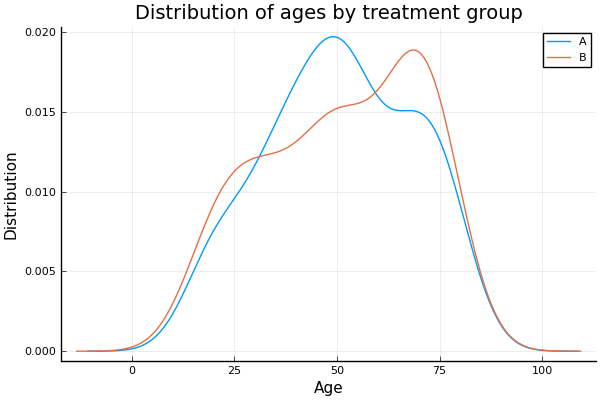

In [34]:
#Plot for Smooth Histogram
@df data density(:Age, group = :Treatment, title = "Distribution of ages by treatment group",
    xlab = "Age", ylab = "Distribution",
    legend = :topright)

We can do the same for the results groups.

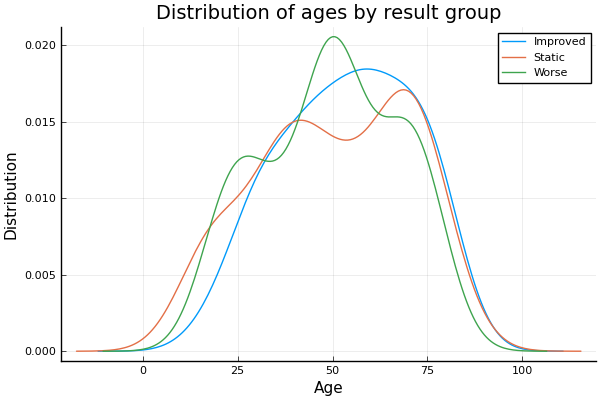

In [35]:
@df data density(:Age, group = :Result, title = "Distribution of ages by result group",
    xlab = "Age", ylab = "Distribution",
    legend = :topright)

We can even discriminate between all of the groups.

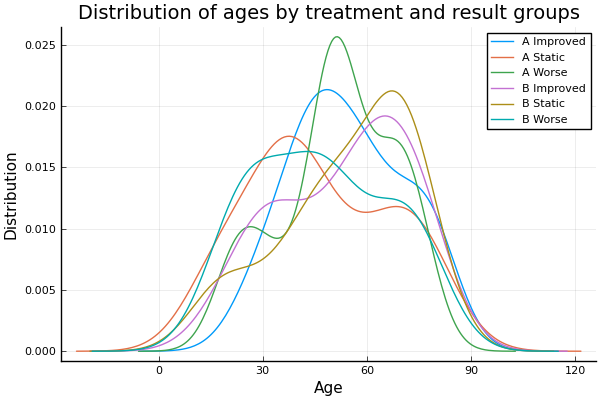

In [36]:
@df data density(:Age, group = (:Treatment, :Result), title = "Distribution of ages by treatment and result groups",
    xlab = "Age", ylab = "Distribution",
    legend = :topright)

Let's create a box-and-whisker plot of the white cell count per treatment group and then per result group.

In [41]:
data["WCC"]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[41]:1
└ @ Core In[41]:1


100-element Array{Float64,1}:
 11.4
 16.1
  7.0
 14.0
 13.4
  7.5
 10.9
 14.6
 11.7
 12.8
 12.7
 13.0
 15.0
  ⋮  
  8.9
 12.9
 10.8
 10.8
 12.1
 12.4
 10.3
  9.4
  6.4
  8.2
 12.9
 12.0

In [37]:
@df data boxplot(data[!, "Treatment"], data[!, "WCC"], lab = "WCC", title = "White cell count by treatment group",
    xlab = "Groups", ylab = "WCC")

UndefVarError: [91mUndefVarError: isnothing not defined[39m

In [39]:
@df data boxplot(:Result, :WCC, lab = "WCC", title = "White cell count by result group",
    xlab = "Groups", ylab = "WCC")

UndefVarError: [91mUndefVarError: isnothing not defined[39m

Finally, we will check on the correlation between the numerical variables using a correlation plot and a corner plot.

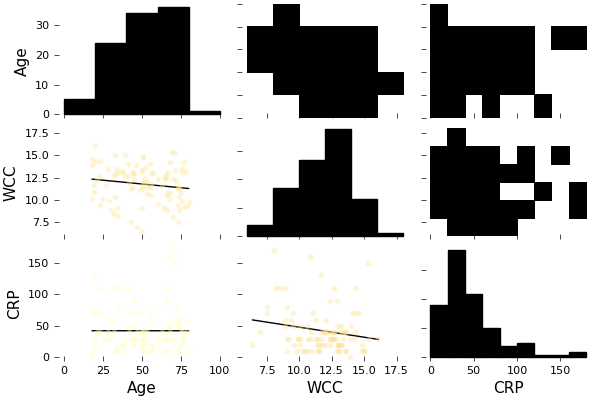

In [42]:
@df data corrplot([:Age :WCC :CRP], grid = false)  # No comma's between arguments in list

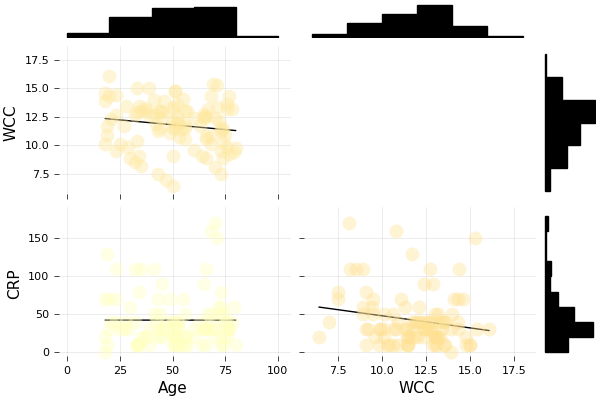

In [43]:
@df data cornerplot([:Age :WCC :CRP], grid = false, compact = true)

## Inferential statistics

We will begin by using Student's _t_ test to compare the mean of a numerical variable between two groups. 

In [44]:
# Difference in age between patients in groups A and B
#or EqualVarianceTTest(dataA[:, :Age], dataB[:, :Age])
HypothesisTests.EqualVarianceTTest(dataA[:, :Age], dataB[:, :Age])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -0.644721
    95% confidence interval: (-7.8884, 6.5989)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8602

Details:
    number of observations:   [53,47]
    t-statistic:              -0.17662778311077354
    degrees of freedom:       98
    empirical standard error: 3.650167511754138


In [45]:
# Only the p value for the difference in white cell count between patients in groups A and B
pvalue(EqualVarianceTTest(dataA[:, :WCC], dataB[:, :WCC]))

0.5194878284921607

In [46]:
# Difference in c-reactive protein level between patients in groups A and B for unequal variances
UnequalVarianceTTest(dataA[:, :CRP], dataB[:, :CRP])

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -6.4994
    95% confidence interval: (-20.3556, 7.3568)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3538

Details:
    number of observations:   [53,47]
    t-statistic:              -0.9320856704713737
    degrees of freedom:       88.48206922849339
    empirical standard error: 6.97296186187374


We can create a variety of linear models using the `GLM.fit()` function.

In [47]:
# Simple model predicting CRP using mean of CRP
fit(LinearModel, @formula(CRP ~ 1), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1

Coefficients:
─────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────
(Intercept)   42.3     3.43439  12.32    <1e-20    35.4854    49.1146
─────────────────────────────────────────────────────────────────────

In [48]:
# Adding Age as a predictor variable
fit(LinearModel, @formula(CRP ~ Age), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age

Coefficients:
────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  42.3229        10.3559     4.09    <1e-4   21.7719    62.8738  
Age          -0.000448734    0.191369  -0.00    0.9981  -0.380215   0.379318
────────────────────────────────────────────────────────────────────────────

In [49]:
# Adding Age and WCC as predictor variables
fit(LinearModel, @formula(CRP ~ Age + WCC), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age + WCC

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  83.6524      23.6854     3.53    0.0006  36.6434    130.661    
Age          -0.0558128    0.190907  -0.29    0.7706  -0.434711    0.323085 
WCC          -3.26451      1.68795   -1.93    0.0560  -6.61462     0.0856059
────────────────────────────────────────────────────────────────────────────

We can conduct a $\chi^2$ test for independence using the `HypothesisTests.ChisqTest()` function.  First we need to look at the counts.  Below we calculate the number of unique values for the Result variable sample space for patients in groups A and B.

In [50]:
# by(dataA, :Result, df -> DataFrame(N = size(df, 1))) has been deprecated
combine(nrow => :N, groupby(dataA, :Result))

,Result,N
,String,Int64
1,Worse,22
2,Static,17
3,Improved,14


In [51]:
# by(dataB, :Result, df -> DataFrame(N = size(df, 1))) has been deprecated
combine(nrow => :N, groupby(dataB, :Result))

,Result,N
,String,Int64
1,Worse,17
2,Static,16
3,Improved,14


In [52]:
# Enter the data in similar order here
observed = reshape([22, 17, 18, 18, 11, 14], (2, 3))
observed

2×3 Array{Int64,2}:
 22  18  11
 17  18  14

In [53]:
ChisqTest(observed)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.1989, 0.1911, 0.1836, 0.1764, 0.1275, 0.1225]
    point estimate:          [0.22, 0.17, 0.18, 0.18, 0.11, 0.14]
    95% confidence interval: Tuple{Float64,Float64}[(0.13, 0.3184), (0.08, 0.2684), (0.09, 0.2784), (0.09, 0.2784), (0.02, 0.2084), (0.05, 0.2384)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.6183

Details:
    Sample size:        100
    statistic:          0.9614102051076865
    degrees of freedom: 2
    residuals:          [0.473113, -0.482672, -0.0840168, 0.0857143, -0.490098, 0.5]
    std. residuals:     [0.865371, -0.865371, -0.15003, 0.15003, -0.808452, 0.808452]


## Exporting a CSV file

Finally we can export our dataframe object as a spreadsheet file.

In [54]:
CSV.write("ProjectData_1_point_0.csv", data);

In [56]:
DataFrame(CSV.File("ProjectData_1_point_0.csv"))

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,74,11.4,20,A,Worse
2,20,16.1,30,B,Worse
3,47,7.0,40,A,Worse
4,41,14.0,50,A,Static
5,50,13.4,40,A,Worse
6,73,7.5,80,B,Worse
7,75,10.9,40,B,Static
8,18,14.6,70,A,Static
9,27,11.7,30,B,Worse


In [57]:
view(data, 3)

┌ Warning: `view(adf::AbstractDataFrame, colind::ColumnIndex)` is deprecated, use `view(adf, :, colind)` instead.
│   caller = top-level scope at In[57]:1
└ @ Core In[57]:1


100-element view(::Array{Int64,1}, :) with eltype Int64:
  20
  30
  40
  50
  40
  80
  40
  70
  30
  30
  40
  10
  10
   ⋮
 110
  10
 160
  30
  40
  90
  10
  60
  20
 110
  90
  20

In [58]:
view(data, :, 3)

100-element view(::Array{Int64,1}, :) with eltype Int64:
  20
  30
  40
  50
  40
  80
  40
  70
  30
  30
  40
  10
  10
   ⋮
 110
  10
 160
  30
  40
  90
  10
  60
  20
 110
  90
  20

In [121]:
#What is the theoretical mean(avg) of following 100 random vals be
y = randn(100)
println(round(mean(y)))

-0.0


In [100]:
# What is the theoretical variance(sq of standard dev) of the following values be? Only integers plz
z = rand(Normal(80, 10), 200) 
println(var(z))

82.54053781793966


In [ ]:
# # Making a copy not a pointer of a var
# A1 = [[1]]
# A2 = copy(A1)
# A1[1] === A2[1]                 # true
# A3 = deepcopy(A1)
# A1[1] === A3[1]                 #false

In [111]:
df2 = copy(data)
df2

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,74,11.4,20,A,Worse
2,20,16.1,30,B,Worse
3,47,7.0,40,A,Worse
4,41,14.0,50,A,Static
5,50,13.4,40,A,Worse
6,73,7.5,80,B,Worse
7,75,10.9,40,B,Static
8,18,14.6,70,A,Static
9,27,11.7,30,B,Worse


In [72]:
#Working on how to delete rows 3,5 and 9 from df
a = [1 2 3 4; 5 6 7 8; 9 10 11 12];
a

3×4 Array{Int64,2}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

In [73]:
a[1:2,:]

2×4 Array{Int64,2}:
 1  2  3  4
 5  6  7  8

-----

In [115]:
df2

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,74,11.4,20,A,Worse
2,20,16.1,30,B,Worse
3,47,7.0,40,A,Worse
4,41,14.0,50,A,Static
5,50,13.4,40,A,Worse
6,73,7.5,80,B,Worse
7,75,10.9,40,B,Static
8,18,14.6,70,A,Static
9,27,11.7,30,B,Worse


In [119]:
delete!(df2, [3,5,9])

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,74,11.4,20,A,Worse
2,20,16.1,30,B,Worse
3,41,14.0,50,A,Static
4,73,7.5,80,B,Worse
5,75,10.9,40,B,Static
6,18,14.6,70,A,Static
7,65,12.8,30,A,Worse
8,23,12.7,40,B,Worse
9,57,13.0,10,B,Improved
